# <span style="color:#8B0000;font-family:Papirus">Árboles generadores</span>

> <span style="color:#8B0000;font-family:Papirus">**Problema:**</span> Para llevar conexión a internet a un conjunto de ciudades, se quiere determinar la manera más económica de distribuir los cables conociendo el costo de conectar algunos de los pares de ciudades. 

Si modelamos la red con un grafo $G$ indicando el costo de cada conexión, obtenemos lo que se conoce como **grafo ponderado** (o con peso). Los lados llevan como etiqueta el costo de la conexión que representan. Para este problema queremos que todas las ciudades estén conectadas (conexidad) y para evitar desperdicios, evitamos los ciclos. Es decir, queremos hallar un árbol como subgrafo de $G$ que tenga todos los vértices y que además represente el costo mínimo de la red. Los pesos de los lados vienen dados por una función $p$, y lo que se quiere es hallar $T$ que minimice $\sum_{e\in E(T)}p(e)$.

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

{(0, 1): Text(0.7499999888241293, 0.433012741974907, '4'),
 (0, 2): Text(0.24999998137354879, 0.4330127121725851, '8'),
 (0, 3): Text(1.4901160971803051e-08, -1.9206817775722963e-08, '5'),
 (0, 4): Text(0.25000005587935364, -0.43301269296576733, '2'),
 (1, 2): Text(-2.9802321943606103e-08, 0.8660254296429223, '7'),
 (1, 3): Text(-0.24999999627470976, 0.4330126982635194, '6'),
 (2, 4): Text(-0.49999996274709757, -5.297752070365647e-09, '5'),
 (3, 4): Text(-0.7499999292194854, -0.43301273667715495, '6'),
 (3, 5): Text(-0.2500000260770317, -0.43301273667715495, '8')}

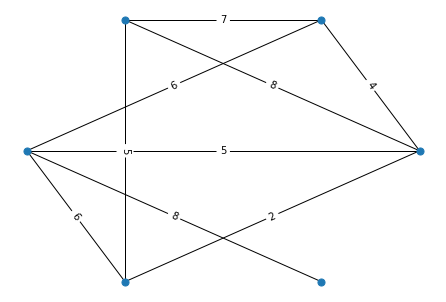

In [14]:
g = nx.Graph()
g.add_edges_from([(0, 1) , (0, 2), (0, 3), (0, 4), (1, 2), 
                  (1, 3), (2, 4), (3, 4), (3, 5)])
etiq = {(0, 1): '4', (0, 2): '8', (0, 3): '5', (0, 4): '2', (1, 2): '7', 
        (1, 3): '6', (2, 4): '5', (3, 4): '6', (3, 5): '8'}

nx.draw(g, pos = nx.circular_layout(g), node_size=50)
nx.draw_networkx_edge_labels(g, pos=nx.circular_layout(g), edge_labels=etiq)

En general, dado un grafo conexo $G$, decimos que un árbol $T$ que es subgrafo de $G$, es un **árbol generador** de $G$ si tiene todos los vértices de $G$. Para un grafo ponderado, un árbol generador tal que la suma de los pesos de sus lados es mínima, se llama **árbol generador minimal** (AGM). 

¿Qué ocurre si usamos un algoritmo voraz para buscar un AGM en un grafo conexo dado? Es decir, partiendo de un vértice $x$, elige el lado con menor peso que incide en $x$, digamos $e = xy$, y continúa con el lado con menor peso que incide en $y$, si no hay otro lado que incida en $x$ con menor peso. Así sucesivamente hasta agotar los vértices. ¿Esto nos dá un AGM?

Supongamos que $G$ es un grafo conexo con $n$ vértices y ponderado con la función $p$, $T$ es un árbol generador de $G$ obtenido con el algoritmo anterior y $U$ es también un árbol generador de $G$.

1. Enumera los lados de $T$ siguiendo el orden del algoritmo: $e_1$, $e_2$, $e_3$, $\dots$, $e_{n - 1}$.
2. Sea $e_k = xy$ el primer lado de $T$ que no está en $E(U)$.
3. Llama $S$ al conjunto de vértices del sub-árbol de $T$ con vértices $e_1$, $e_2$, $e_3$, $\dots$, $e_{k - 1}$.
4. Entonces, por ejemplo, $x\in S$, $y\not\in S$.
5. Como $U$ genera $G$, existen un camino en $U$ de $x$ a $y$, y un lado $\bar{e}$ en ese camino con un vértice $z$ en $S$ y otro fuera de $S$.
6. Al construir $T$, estando en $z$ **no se eligió** $\bar{e}$.
7. Entonces $p(e_k)\leq p(\bar{e})$.
8. Si $\bar{e}$ está en $T$, tiene que ser algún $e_j$ con $j > k$.
9. Elimina $\bar{e}$ de $U$ y cambialo por $e_k$.
10. Llama $U_1$ al árbol que resulta.
11. $U_1$ también genera $T$ y además 
$\sum_{e\in E(U_1)}p(e) = \sum_{e\in E(U)}p(e) - p(\bar{e}) + p(e_k)\leq \sum_{e\in E(U)}p(e)$
12. Obtuvimos otro árbol generador con menor peso y que tiene el lado $e_k$.
13. Siguiendo así, obtienes $U_1$, $U_2$, $U_3$, $\dots$ árboles generadores con peso cada vez menor y con cada vez más lados de $T$.
14. Eventualmente obtrendrás $U_m = T$ y así $\sum_{e\in E(T)}p(e)\leq \sum_{e\in E(U)}p(e)$.

> <span style="color:#8B0000;font-family:Papirus">**Teorema:**</span> Si $T$ es un árbol generador de un grafo ponderado (conexo) $G$ obtenido mediante el algoritmo voraz, entonces $T$ es un AGM para $G$. 

¿Cuál es la eficiencia de este algoritmo? Para verlo, calculemos la cantidad de comparaciones usando una tabla:

|   $I$    |   $II$   |   $III$   |
|:--------:|:--------:|:---------:|
|    $x$   |   $y$    |  $p(xy)$  |
| $\vdots$ | $\vdots$ |  $\vdots$ |

1. La columna $I$ contiene los vértices fuera de $S$.
2. Para cada $x$ de la columna $I$, la columna $II$ contiene un vértice $y$ tal que $xy$ es un lado de costo mínimo con $y\in S$.
3. La columna $III$ contiene el peso de $xy$.
4. En el paso $i$ del algoritmo, $|S| = i$ y hay $n - i$ vértices en la columna $I$.
5. Ahora hay que hallar el mínimo $p(x_0y_0)$ en la columna $III$: $n - i - 1$ comparaciones.
6. El lado $x_0y_0$ agrega $x_0$ a $S$, hay que actualizar la tabla. 
7. Entonces ha que comprobar si $p(xx_0) < p(xy)$ para cada uno de los $n - i - 1$ posibles $x$ de la columna $I$.
8. Eso implica $n - i - 1$ comparaciones más.
9. En total son $\sum_{i = 1}^{n - 1}2(n - i - 1) = (n - 1)(n - 2)$

Por lo tanto la eficiencia del algoritmo voraz para construir un AGM de un árbol ponderado con $n$ vértices es $O(n^2)$.